# Exploratory Data Analysis

The purpose of this section of the notebook is to provide some key highlights of the baseline data being used. This showcases the various attributes, any specific transformations, and key relationships.

In [2]:
# Import the relevant libraries, and load the dataset
import pandas as pd
import seaborn as sns
import math

# Plotting
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
# morancolor=sns.color_palette(['#66260b', '#cb8034', '#ddc08d', '#9c886f', '#47261a','#363634', '#524636', '#ac7330', '#b19a78', '#d1c5ab'])
# sns.set_theme(style="whitegrid")#, palette=morancolor)
# plt.rcParams['font.family']='serif'
# plt.rcParams['figure.dpi'] =100 # high resolution

df = pd.read_csv('./../datasets/original/WA_Fn-UseC_-Telco-Customer-Churn.csv')

As can be seen below, the dataset contains 21 columns and 7,043 rows

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Attribute Definitions
- **customerID** is the unique identifier per customer.
- **MonthlyCharges** and **TotalCharges** identify the monthly and total spending to date for the population. Both should be float attributes.
- **tenure** is how long the customer has been with the service, measured in months.
- All other 16 attributes are categorical and highlight customer attributes (e.g. Senior Citizen) or usage of various features or (e.g. Phone Service).

In [5]:
df.sample(n=5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
285,6202-DYYFX,Female,0,No,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Credit card (automatic),76.00,1783.6,No
6723,2068-WWXQZ,Male,0,No,No,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.05,902,No
1530,3703-VAVCL,Male,0,Yes,Yes,2,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,No,Credit card (automatic),90.00,190.05,Yes
3302,7774-OJSXI,Male,0,No,No,31,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,103.45,3066.45,Yes
1263,6818-WOBHJ,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.6,Yes


## Basic Transformations

Converting **Total Charges** to a float attribute.

In [6]:
df['TotalCharges'] = df['TotalCharges'].str.replace(r' ','0').astype(float)
df['TotalCharges'].dtypes

dtype('float64')

- Changing **Churn** to better represent a binary attribute with 1s and 0s vs. "No" or "Yes". This aids further computation.
- Changing **Senior Citizen** to a categorical attribute (No/Yes) from 1s and 0s.

In [7]:
df['Churn'] = df['Churn'].apply(lambda x: 0 if x == "No" else 1)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: "No" if x == 0 else "Yes")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Bin the **tenure** attribute into 10 buckets.

In [8]:
df['tenure_bins'] = pd.cut(df['tenure'], bins=10, include_lowest=True)

Bin the **MonthlyCharges** attribute into 10 buckets.

In [9]:
df['monthlyCharges_bins'] = pd.cut(df['MonthlyCharges'], bins=10, include_lowest=True)

## Basic Analyses

### Customer counts by categorical attributes

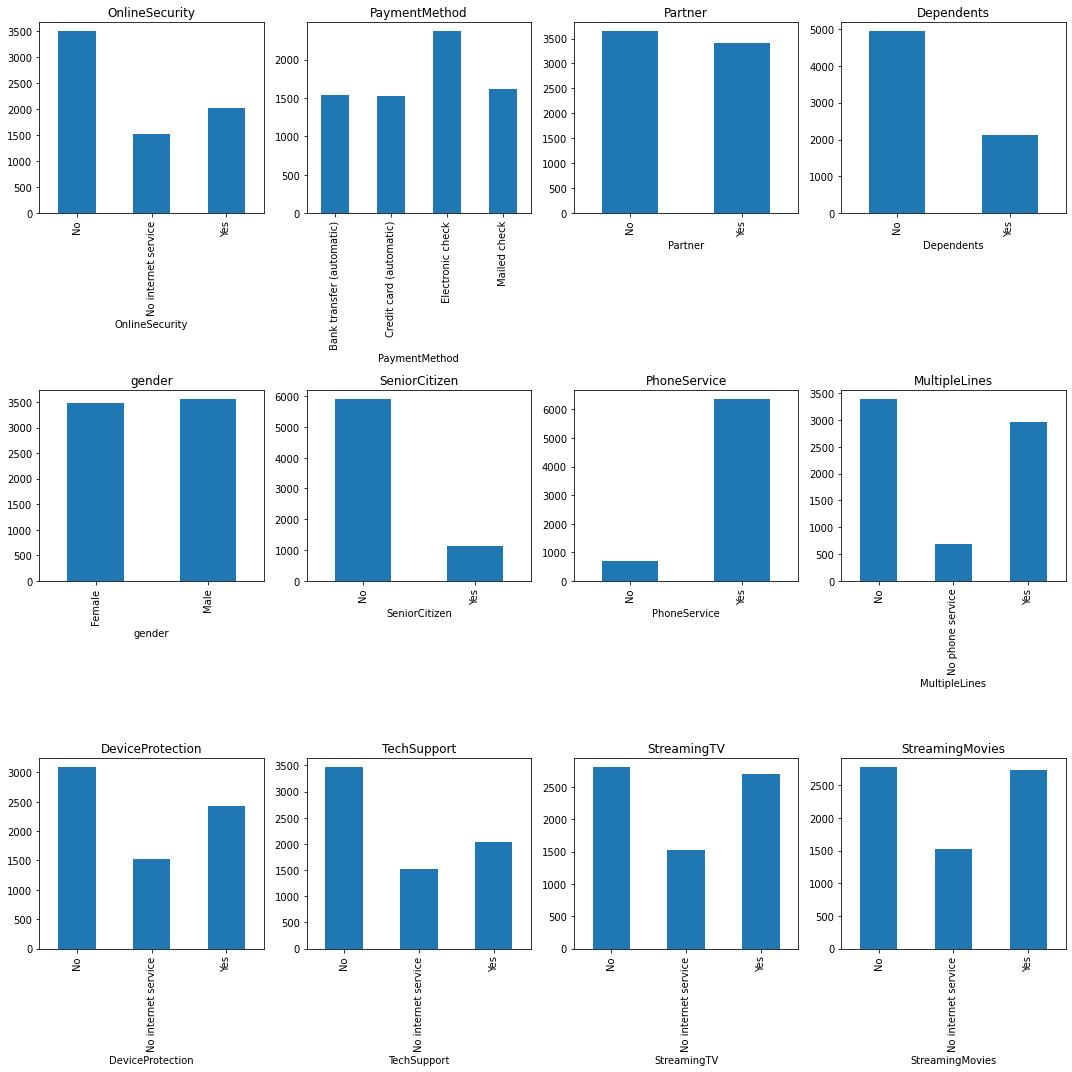

In [88]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
collist=['OnlineSecurity', 'PaymentMethod', 'Partner', 'Dependents',
        'gender', 'SeniorCitizen', 'PhoneService', 'MultipleLines',
         'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies'
        ]
for i, var in enumerate(collist):
    # Adjusting for the multi-line assignments
    if i <=3:
        pos1=0
        pos2=i
    elif i <=7:
        pos1=1
        pos2=i-4
    elif i <=11:
        pos1=2
        pos2=i-8
    tt = df.groupby(var).size()
    tt.plot(kind='bar', ax=axes[pos1,pos2], title=str(var))
plt.tight_layout()

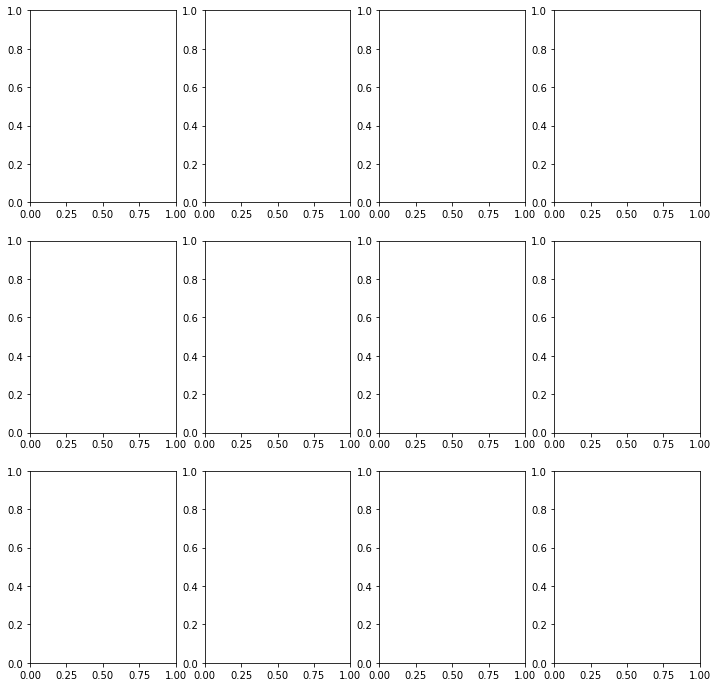

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

### Histogram of Customer Tenure (in months)

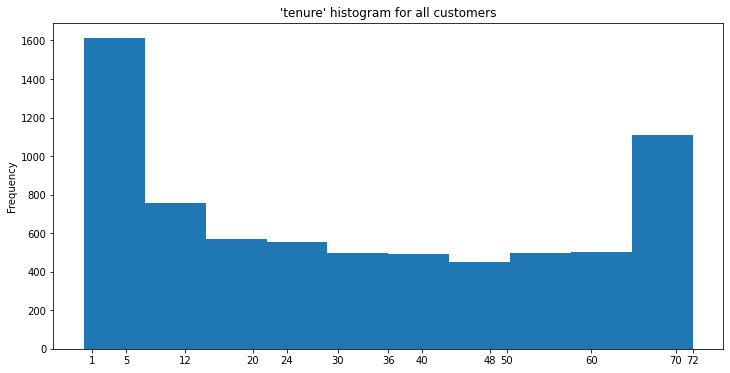

In [44]:
ax = df['tenure'].plot(
    kind='hist',
    title="'tenure' histogram for all customers",
    figsize=(12,6), 
    xticks=[1,5,12,20,24,30,36,40,48,50,60,70,72]
)

This is an interesting histogram where a large percentage of customers are fairly new (less than a year old) while a number of older customers (greater than 5 years) make up another large percentage.

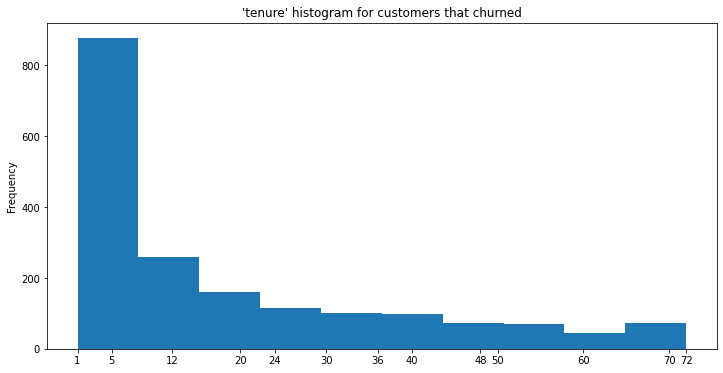

In [45]:
churned = df[ df['Churn']==1]
ax = churned['tenure'].plot(
    kind='hist',
    title="'tenure' histogram for customers that churned",
    figsize=(12,6), 
    xticks=[1,5,12,20,24,30,36,40,48,50,60,70,72])

As one would expect, most of the churned customers are less than a year old. Many organizations find this to be the biggest segment of churn, i.e. customers fairly new to the service or product.

(Note: A good lesson on survivorship bias.)

### Churned customer population
*(Note: 0 = Not churned, 1 = Churned)*

0    5174
1    1869
Name: Churn, dtype: int64

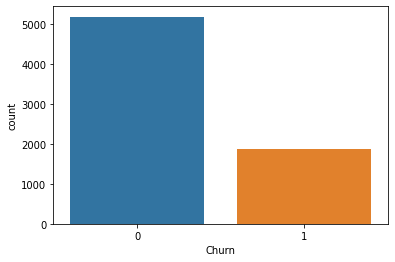

In [10]:
sns.countplot(x = "Churn", data = df)
df.loc[:, 'Churn'].value_counts()

### Churn ratio by categorical attributes

In [11]:
# def barall(df,lst,target,h=4,w=15,cut=3,hspace=.5,wspace=.25,rotatelst=[],rotation=20,xticksize=10,titlesize=11,yticksize=10):
#     f=plt.figure(figsize=(w,h))
#     plt.subplots_adjust(hspace=hspace,wspace=wspace)
#     for i,col in enumerate(lst):
#         f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
#         sns.barplot(data=df,x=col,y=target)
#         if col in rotatelst: plt.xticks(rotation=rotation)
#         plt.xticks(fontsize=xticksize)
#         plt.yticks(fontsize=yticksize)
#         plt.xlabel('')
#         plt.title(col,fontweight='bold',fontsize=titlesize)
#         plt.ylabel('')
#         despine()
        
# catcol=df.select_dtypes("O").nunique().sort_values(ascending=False)[1:].index.tolist()
# print(f"We have {len(catcol)} categorical features")

# barall(df,catcol,'Churn',w=10,h=11,cut=4,
#        rotatelst=['PaymentMethod','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
#                  'Contract','StreamingTV','StreamingMovies'],
#        xticksize=8,rotation=27,hspace=1)

# # Accredition: https://www.kaggle.com/muladpham/telco-customer-churn-moranfinan

### Exploring the relationship between tenure and monthly and total charges

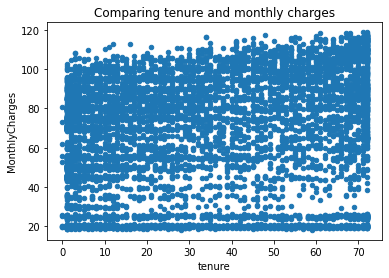

In [23]:
ax = df.plot(x='tenure', y='MonthlyCharges', kind='scatter', title="Comparing 'tenure' and monthly charges")

No particular relationship seems to be apparent.

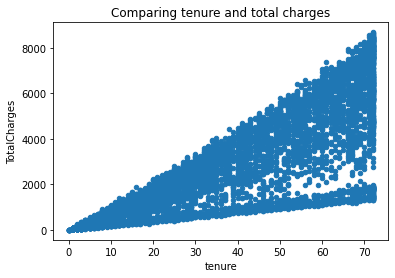

In [25]:
ax = df.plot(x='tenure', y='TotalCharges', kind='scatter', title="Comparing 'tenure' and total charges")

As one would expect, there is a linear relationship between tenure and total charges, i.e. with time, one's total charges grow.

### Monthly Charges by various attributes

### Monthly Charges by Uniform Spending Cohorts

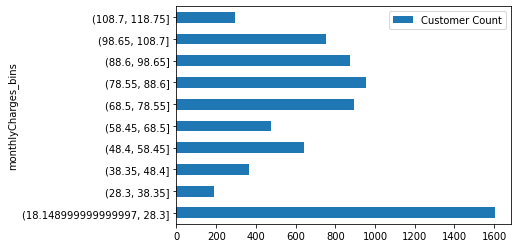

In [16]:
mc_bin = df.groupby(by='monthlyCharges_bins').size().to_frame()
mc_bin.columns = ['Customer Count']
ax = mc_bin.plot(kind='barh')

By dividing the customer base into 10 uniform cohorts, one can see that a large proportion spend less than \\$28 dollars per month. A non-trivial proportion also spends above \\$100 per month.

### (Pending) Feature Importance
Resource: https://www.kaggle.com/muladpham/telco-customer-churn-moranfinan